# Optimization algorithms

I want to know which ambulance to send. 

- Travel time: lower = benefit single case
- Coverage disruption = drop in % for primary and secondary

All the bases:


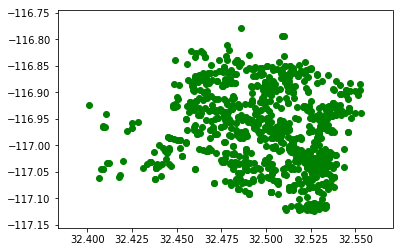

Every single call:


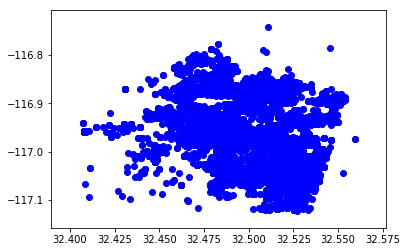

In [ ]:
from execute import set_coverage
set_coverage()

Next Step will probably be to write a function that returns the best estimate time traveled between base --> nearest demand point. 

## Step 1: set coverage algorithm

a) through k-means, find a set of 8 ambulances that has all of Tijuana covered by primary

b) find the set of 8 that covers all primary and maximized the secondary coverage. 
- After having the set of all base combinations that satisfied r1 = 10, find the set with the highest percentage covered by r2=14

## Step 2: where the fun is

a) Find the travel times of each of the 8 ambulances, through lookup or query

b) Find the set disruption each ambulance would cause, as a result of r1 and r2. Include severity as a parameter. 
Coverage = Primary Coverage + Secondary Coverage 

## Step 3: 

a) Implement the dynamic, iterative case. 